# Assigment 1. Data set exploration. 


We have a data set about characteristics of over 750 buildings. The efficiency of the building is measured as either heating load or cooling load. Our goal is to find three interesting relationships within the variables which help us understand the energy efficiency of these buildings. For this I will use visualization and summary statistical methods to explore a data set.

First, we load the data file and look into it. I change two variables to categorical type: Orientation and Glazing.Area.Distribution.   

In [4]:
read.efficiency = function(file = 'EnergyEfficiencyData.csv'){
  ## Read the csv file
  en.efficiency <- read.csv(file, header = TRUE)
  
  ## Coerce some numeric columns to categorycal
  catcols <- c('Orientation', 'Glazing.Area.Distribution')
  en.efficiency[, catcols] <- lapply(en.efficiency[, catcols], as.factor)

  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  en.efficiency[complete.cases(en.efficiency), ]
}

#read data
en.efficiency = read.efficiency()

#look into data
str(en.efficiency)

'data.frame':	768 obs. of  10 variables:
 $ Relative.Compactness     : num  0.98 0.98 0.98 0.98 0.9 0.9 0.9 0.9 0.86 0.86 ...
 $ Surface.Area             : num  514 514 514 514 564 ...
 $ Wall.Area                : num  294 294 294 294 318 ...
 $ Roof.Area                : num  110 110 110 110 122 ...
 $ Overall.Height           : num  7 7 7 7 7 7 7 7 7 7 ...
 $ Orientation              : Factor w/ 4 levels "2","3","4","5": 1 2 3 4 1 2 3 4 1 2 ...
 $ Glazing.Area             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Glazing.Area.Distribution: Factor w/ 6 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Heating.Load             : num  15.6 15.6 15.6 15.6 20.8 ...
 $ Cooling.Load             : num  21.3 21.3 21.3 21.3 28.3 ...


 Look into statistical summaries. We use only numerical data from our data set. 


In [5]:
sub.data = en.efficiency[, c('Relative.Compactness', 'Surface.Area',
                             'Wall.Area', 'Roof.Area', 'Overall.Height',
                             'Glazing.Area', 'Heating.Load','Cooling.Load')]
summary(sub.data)

 Relative.Compactness  Surface.Area     Wall.Area       Roof.Area    
 Min.   :0.6200       Min.   :514.5   Min.   :245.0   Min.   :110.2  
 1st Qu.:0.6825       1st Qu.:606.4   1st Qu.:294.0   1st Qu.:140.9  
 Median :0.7500       Median :673.8   Median :318.5   Median :183.8  
 Mean   :0.7642       Mean   :671.7   Mean   :318.5   Mean   :176.6  
 3rd Qu.:0.8300       3rd Qu.:741.1   3rd Qu.:343.0   3rd Qu.:220.5  
 Max.   :0.9800       Max.   :808.5   Max.   :416.5   Max.   :220.5  
 Overall.Height  Glazing.Area     Heating.Load    Cooling.Load  
 Min.   :3.50   Min.   :0.0000   Min.   : 6.01   Min.   :10.90  
 1st Qu.:3.50   1st Qu.:0.1000   1st Qu.:12.99   1st Qu.:15.62  
 Median :5.25   Median :0.2500   Median :18.95   Median :22.08  
 Mean   :5.25   Mean   :0.2344   Mean   :22.31   Mean   :24.59  
 3rd Qu.:7.00   3rd Qu.:0.4000   3rd Qu.:31.67   3rd Qu.:33.13  
 Max.   :7.00   Max.   :0.4000   Max.   :43.10   Max.   :48.03  

Here we can see min and max values of our variables, compare Mean and Medium and see that almost all of them have screwed distribution.


# Conclusion 1 
We can look into correlation as well. From the table below we can see that Heating Load and Cooling Load are strongly correlated. There are strong negative correlations between Heating and Cooling Load with Roof Area as well.  

In [6]:
cor(sub.data)

,Relative.Compactness,Surface.Area,Wall.Area,Roof.Area,Overall.Height,Glazing.Area,Heating.Load,Cooling.Load
Relative.Compactness,1.000000e+00,-9.919015e-01,-0.2037817,-8.688234e-01,0.8277473,7.617400e-20,0.6222722,0.6343391
Surface.Area,-9.919015e-01,1.000000e+00,0.1955016,8.807195e-01,-0.8581477,4.664140e-20,-0.6581202,-0.6729989
Wall.Area,-2.037817e-01,1.955016e-01,1.0000000,-2.923165e-01,0.2809757,0.000000e+00,0.4556712,0.4271170
Roof.Area,-8.688234e-01,8.807195e-01,-0.2923165,1.000000e+00,-0.9725122,-1.197187e-19,-0.8618283,-0.8625466
Overall.Height,8.277473e-01,-8.581477e-01,0.2809757,-9.725122e-01,1.0000000,0.000000e+00,0.8894307,0.8957852
Glazing.Area,7.617400e-20,4.664140e-20,0.0000000,-1.197187e-19,0.0000000,1.000000e+00,0.2698410,0.2075050
Heating.Load,6.222722e-01,-6.581202e-01,0.4556712,-8.618283e-01,0.8894307,2.698410e-01,1.0000000,0.9758618
Cooling.Load,6.343391e-01,-6.729989e-01,0.4271170,-8.625466e-01,0.8957852,2.075050e-01,0.9758618,1.0000000


# Conclusion 2



Next, let's visualize some data.
From barplot, we can see that we have equal number of buildings with the same orientation. 
I use boxplot plot to see correlation between heating load and orientation of buildings. 
From these boxplots and the fact that we have equal number of buildings with the same orientation we can make a conclusion that heating load doesn't depend on orientation.

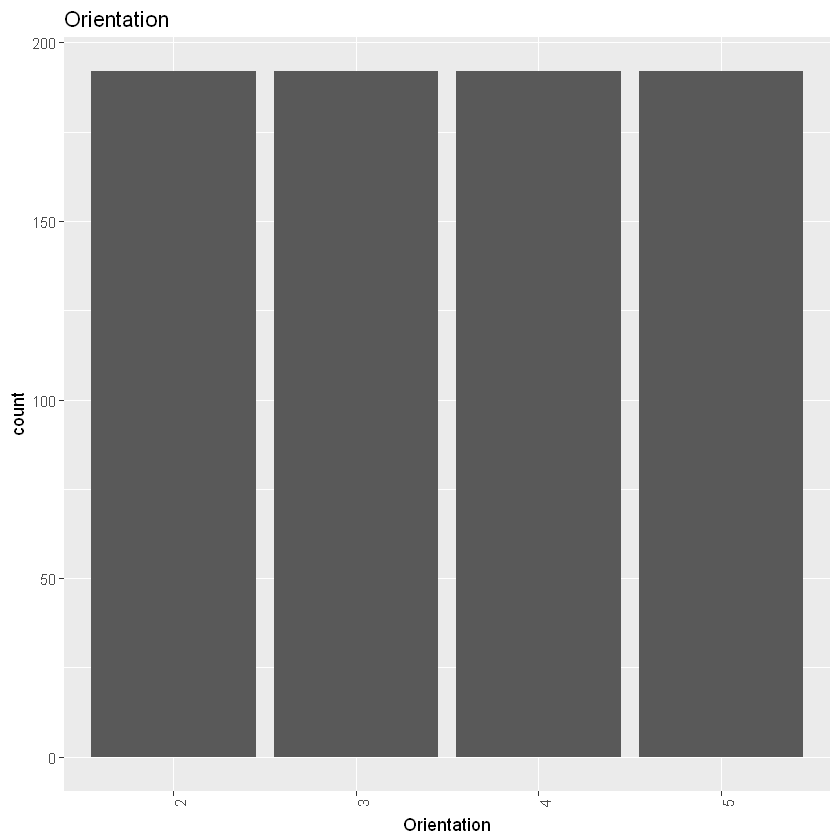

In [11]:
require(ggplot2)
ggplot(en.efficiency, aes(x=reorder(Orientation,Orientation, 
                                    function(x)-length(x)))) +
  geom_bar() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
  ggtitle('Orientation') + xlab('Orientation')

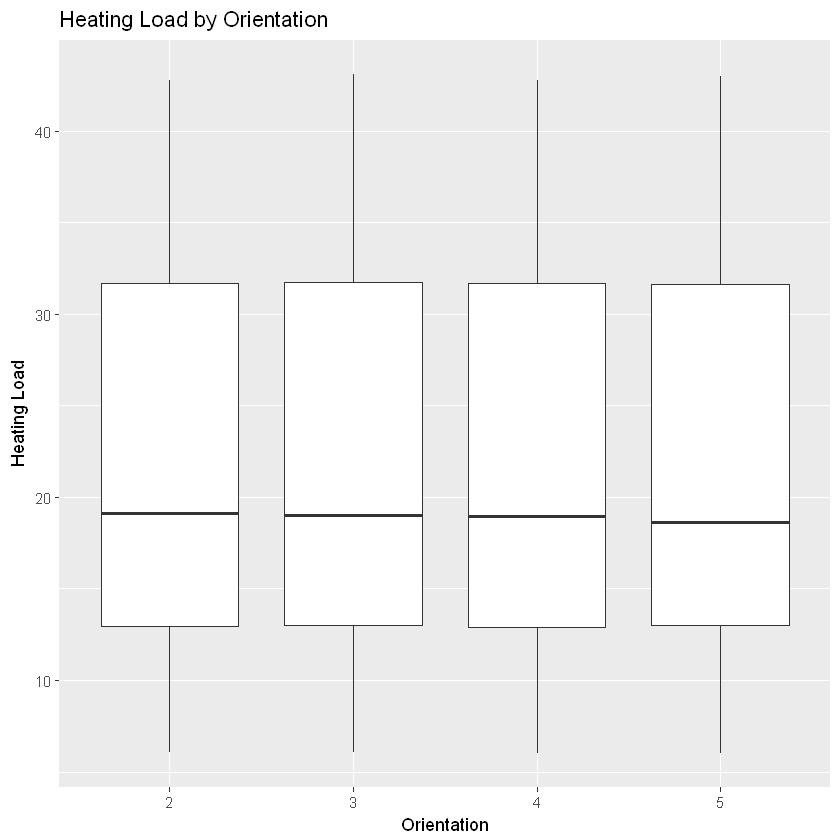

In [8]:
ggplot(en.efficiency, aes(x = factor(Orientation), y = Heating.Load)) +
geom_boxplot() + ylab('Heating Load') + xlab('Orientation') + 
ggtitle('Heating Load by Orientation')


# Conclusion 3
The heating and cooling load of buildings depends on glazing area. The bigger glazing area the bigger heating and cooling load. I based this conclusion looking into violin plot below.  

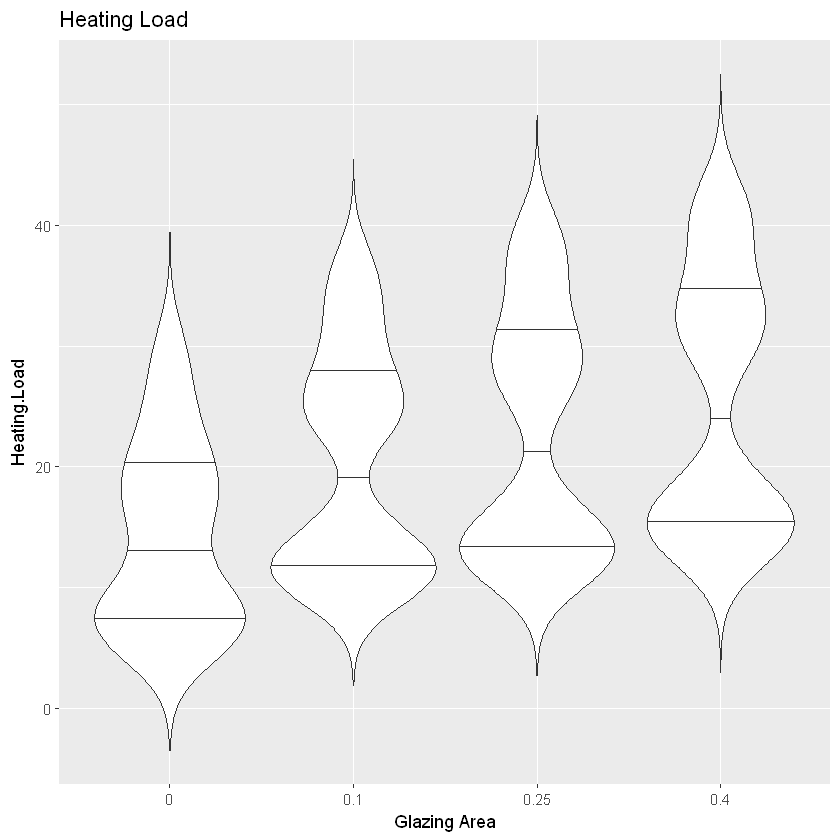

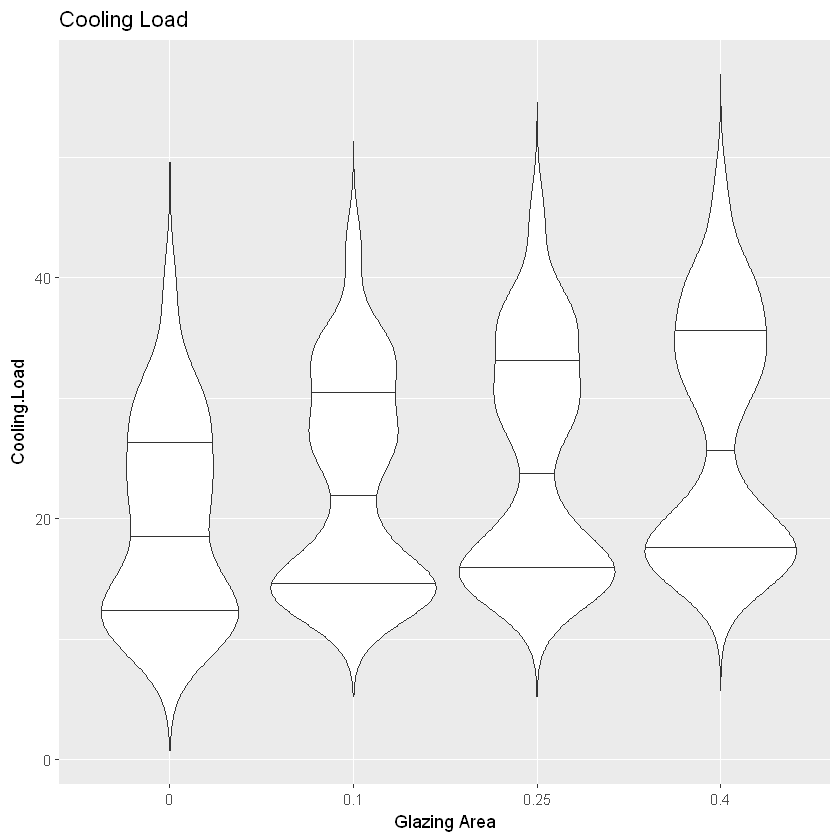

In [10]:
ggplot(en.efficiency, aes(x = factor(Glazing.Area), y = Heating.Load)) + 
  geom_violin(trim = FALSE, draw_quantiles = c(0.25, 0.5, 0.75)) +
  xlab('Glazing Area')  + ggtitle('Heating Load')


ggplot(en.efficiency, aes(x = factor(Glazing.Area), y = Cooling.Load)) + 
  geom_violin(trim = FALSE, draw_quantiles = c(0.25, 0.5, 0.75)) +
  xlab('Glazing Area')  + ggtitle('Cooling Load')

